In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [74]:
#Create synthetic datapoints 
from sklearn.datasets import make_classification
x,y=make_classification( n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1)

In [75]:
pd.DataFrame(x)[0]
pd.DataFrame(x)[1]

0      0.996711
1      0.496967
2      0.975446
3     -1.798133
4     -1.804242
         ...   
995   -0.019590
996   -2.497224
997    0.804426
998   -0.109309
999   -2.539005
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

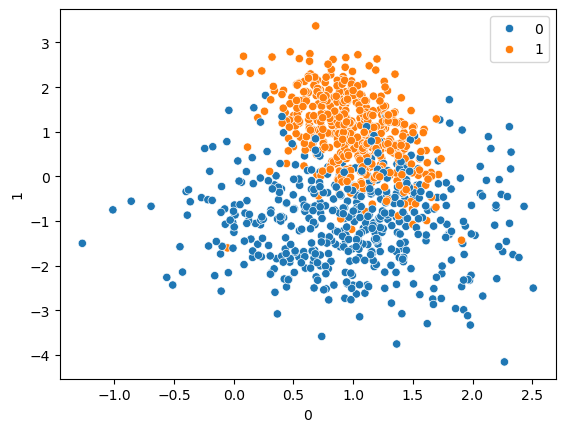

In [76]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=11)

In [78]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [79]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)


In [80]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred)
confus=confusion_matrix(y_test,y_pred)
print(report)
print(confus)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       107
           1       0.83      0.90      0.87        93

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

[[90 17]
 [ 9 84]]


In [81]:
from sklearn.svm import SVC
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_p=rbf.predict(x_test)
report=classification_report(y_test,y_p)
confus=confusion_matrix(y_test,y_p)
print(report)
print(confus)




              precision    recall  f1-score   support

           0       0.92      0.87      0.89       107
           1       0.86      0.91      0.89        93

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

[[93 14]
 [ 8 85]]


In [82]:
from sklearn.svm import SVC
pl=SVC(kernel='poly')
pl.fit(x_train,y_train)
y_predict1=pl.predict(x_test)
report=classification_report(y_test,y_p)
confus=confusion_matrix(y_test,y_p)
print(report)
print(confus)



              precision    recall  f1-score   support

           0       0.92      0.87      0.89       107
           1       0.86      0.91      0.89        93

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

[[93 14]
 [ 8 85]]


In [83]:
from sklearn.svm import SVC
sigmod=SVC(kernel='sigmoid')
sigmod.fit(x_train,y_train)
y_predict1=sigmod.predict(x_test)
report=classification_report(y_test,y_p)
confus=confusion_matrix(y_test,y_p)
print(report)
print(confus)



              precision    recall  f1-score   support

           0       0.92      0.87      0.89       107
           1       0.86      0.91      0.89        93

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

[[93 14]
 [ 8 85]]


In [84]:
from sklearn.svm import SVC
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_p=rbf.predict(x_test)
report=classification_report(y_test,y_p)
confus=confusion_matrix(y_test,y_p)
print(report)
print(confus)



              precision    recall  f1-score   support

           0       0.92      0.87      0.89       107
           1       0.86      0.91      0.89        93

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

[[93 14]
 [ 8 85]]


# HyperParameter Tunning

In [93]:
param_grid={
    'C':[0.1,1,10,100,1000,10000],
    'gamma':[1,0.1,0.01,0.001,0.5],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
}

In [94]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(),param_grid=param_grid,scoring='accuracy',refit=True,cv=3,verbose=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.865 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.876 total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.858 total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.839 total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.813 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.854 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoi

[CV 2/3] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.843 total time=   0.0s
[CV 3/3] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.857 total time=   0.0s
[CV 1/3] END .....C=1, gamma=0.5, kernel=linear;, score=0.865 total time=   0.0s
[CV 2/3] END .....C=1, gamma=0.5, kernel=linear;, score=0.861 total time=   0.0s
[CV 3/3] END .....C=1, gamma=0.5, kernel=linear;, score=0.876 total time=   0.0s
[CV 1/3] END .......C=1, gamma=0.5, kernel=poly;, score=0.858 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.5, kernel=poly;, score=0.839 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.5, kernel=poly;, score=0.846 total time=   0.0s
[CV 1/3] END ........C=1, gamma=0.5, kernel=rbf;, score=0.891 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.5, kernel=rbf;, score=0.858 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.5, kernel=rbf;, score=0.876 total time=   0.0s
[CV 1/3] END ....C=1, gamma=0.5, kernel=sigmoid;, score=0.813 total time=   0.0s
[CV 2/3] END ....C=1, gamma=

[CV 2/3] END ....C=100, gamma=0.01, kernel=poly;, score=0.745 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.01, kernel=poly;, score=0.737 total time=   0.0s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.869 total time=   0.0s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.876 total time=   0.0s
[CV 1/3] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.865 total time=   0.0s
[CV 2/3] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.861 total time=   0.0s
[CV 3/3] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.876 total time=   0.0s
[CV 1/3] END .C=100, gamma=0.001, kernel=linear;, score=0.861 total time=   0.0s
[CV 2/3] END .C=100, gamma=0.001, kernel=linear;, score=0.861 total time=   0.0s
[CV 3/3] END .C=100, gamma=0.001, kernel=linear;, score=0.872 total time=   0.0s
[CV 1/3] END ...C=100, gamma=0.001, kernel=poly;, score=0.509 total time=   0.0s
[CV 2/3] END ...C=100, gamma

[CV 1/3] END .C=10000, gamma=0.1, kernel=linear;, score=0.861 total time=   1.5s
[CV 2/3] END .C=10000, gamma=0.1, kernel=linear;, score=0.861 total time=   1.5s
[CV 3/3] END .C=10000, gamma=0.1, kernel=linear;, score=0.872 total time=   1.3s
[CV 1/3] END ...C=10000, gamma=0.1, kernel=poly;, score=0.880 total time=   0.0s
[CV 2/3] END ...C=10000, gamma=0.1, kernel=poly;, score=0.835 total time=   0.0s
[CV 3/3] END ...C=10000, gamma=0.1, kernel=poly;, score=0.842 total time=   0.0s
[CV 1/3] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 2/3] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/3] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 1/3] END C=10000, gamma=0.1, kernel=sigmoid;, score=0.824 total time=   0.0s
[CV 2/3] END C=10000, gamma=0.1, kernel=sigmoid;, score=0.809 total time=   0.0s
[CV 3/3] END C=10000, gamma=0.1, kernel=sigmoid;, score=0.842 total time=   0.0s
[CV 1/3] END C=10000, gamma=

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [95]:
grid.best_params_

{'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}

In [96]:
y_p=grid.predict(x_test)
report=classification_report(y_test,y_p)
confus=confusion_matrix(y_test,y_p)
print(report)
print(confus)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       107
           1       0.86      0.95      0.90        93

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

[[93 14]
 [ 5 88]]
